In [22]:
import numpy as np
import random
from mnist import MNIST
import matplotlib.pyplot as plt

In [23]:
mndata = MNIST('Dataset')
trainX = np.array(mndata.load_training()[0])[:20000]
trainY = np.array(mndata.load_training()[1])[:20000]

#random selection of data for training and validation
valIndices = np.random.choice(len(trainX), 2000)
nonValIndices = [x for x in range(len(trainX)) if x not in valIndices]

valX = trainX[valIndices]
valY = trainY[valIndices]

trainX = trainX[nonValIndices]
trainY = trainY[nonValIndices]

testX = np.array(mndata.load_testing()[0])[:2000]
testY = np.array(mndata.load_testing()[1])[:2000]

In [24]:
def feat(data,i):
    return [1] + data[i].tolist()

def oneHot(clas, noOfClasses):
    feat = np.zeros(noOfClasses)
    feat[clas] = 1;
    return feat

trnX = np.array([feat(trainX,i) for i in range(trainX.shape[0])])/256.0
trnY = np.array([oneHot(trainY[i], 10) for i in range(trainX.shape[0])])

tstX = np.array([feat(testX,i) for i in range(testX.shape[0])])/256.0
tstY = np.array([oneHot(testY[i], 10) for i in range(testX.shape[0])])

valX = np.array([feat(valX,i) for i in range(valX.shape[0])])/256.0
valY = np.array([oneHot(valY[i], 10) for i in range(valX.shape[0])])

In [30]:
def softmax(x):
    x = np.exp(x)
    x = x/x.sum(axis=1)[:, None]
    return x

def error(trnY, y, lamda):
    err = 0    
    for i in range(len(trnY)):
        for k in range(10):
            if(y[i, k] < 0.00001):
                y[i, k] = 0.00001
            elif(y[i, k] > 0.99999):
                y[i, k] = 0.99999
            err += trnY[i, k]*np.log(y[i, k])
    err=-1*err/len(trnY)
    # L2 regularization
    #err += lamda * np.linalg.norm(w)**2
    # L1 regularization
    err += lamda * np.sum(np.abs(w))

def accuracy(y, y_):
    y_ = np.argmax(y_, axis = 1)
    y = np.argmax(y, axis = 1)
    count = 0
    for i in range(len(y_)):
        if y_[i] == y[i]:
            count += 1
    return count*100.0/len(y_)

In [35]:
err = [[], [], []]
acc = [[], [], []]

lr = 0.0001
w = (np.random.rand(10, 785)-0.5)
w_past = np.zeros((4, 10, 785))
count = 0
past_loss = 0

In [36]:
lamda = [0.01,0.001, 0.0001, 0.00001]

In [11]:
for i in range(10):
    print i
    y = softmax(np.dot(trnX,np.transpose(w)))
    loss = error(trnY, y)
    err[0].append(loss)
    err[1].append(error(tstY, softmax(np.dot(tstX,np.transpose(w)))))
    err[2].append(error(valY, softmax(np.dot(valX,np.transpose(w)))))
    acc[0].append(accuracy(trnY, y))
    acc[1].append(accuracy(tstY, softmax(np.dot(tstX,np.transpose(w)))))
    acc[2].append(accuracy(valY, softmax(np.dot(valX,np.transpose(w)))))
    if past_loss <= loss and i > 100:
        count += 1
        w_past[0] = w_past[1]
        w_past[1] = w_past[2]
        w_past[2] = w_past[3]
        w_past[3] = w
    elif past_loss > loss:
        count = 0
        past_loss = -1
    if count > 3:
        break
    grad = np.dot(np.transpose(trnY-y), trnX)
    w = w + lr*grad

0


KeyboardInterrupt: 

In [60]:
max_acc=0

In [61]:
#L1 Regularization
err1 = [[], [], []]
acc1 = [[], [], []]
for k in range(len(lamda)):
    err = [[], [], []]
    acc = [[], [], []]

    lr = 0.0001
    w = (np.random.rand(10, 785)-0.5)
    w_past = np.zeros((4, 10, 785))
    count = 0
    past_loss = 0
    for i in range(10):
        print i
        y = softmax(np.dot(trnX,np.transpose(w)))
        loss = error(trnY, y, lamda[k])
        err[0].append(loss)
        err[1].append(error(tstY, softmax(np.dot(tstX,np.transpose(w))),lamda[k]))
        err[2].append(error(valY, softmax(np.dot(valX,np.transpose(w))),lamda[k]))
        acc[0].append(accuracy(trnY, y))
        acc[1].append(accuracy(tstY, softmax(np.dot(tstX,np.transpose(w)))))
        acc[2].append(accuracy(valY, softmax(np.dot(valX,np.transpose(w)))))
        if past_loss <= loss:
            count += 1
            w_past[0] = w_past[1]
            w_past[1] = w_past[2]
            w_past[2] = w_past[3]
            w_past[3] = w
        elif past_loss > loss:
            count = 0
            past_loss = -1
        if count > 3:
            break
        grad = np.dot(np.transpose(trnY-y), trnX)
        # L2
        #grad += 2*lamda[k]*w
        # # L1
        grad += lamda[k]*np.sign(w)
        w = w + lr*grad
        
    w_f = w
    if acc[2][-3]>max_acc:
        max_acc=acc[0][-3]
        w_best=w_f
        err1=err
        acc1=acc

0
1
2
3
4
5
6
7
8
9
0
1
2


KeyboardInterrupt: 

In [67]:
err

[[None, None, None], [None, None, None], [None, None]]

Final testing error =  None
Final training error =  None
Final validation error =  None


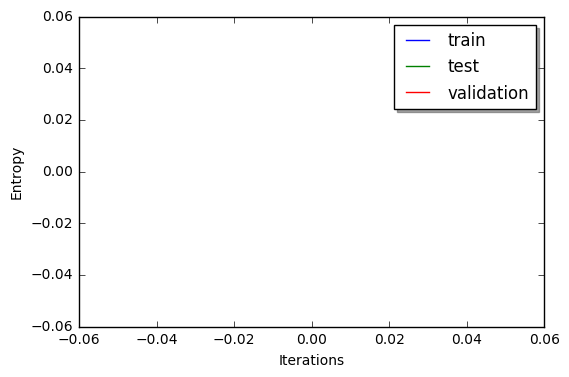

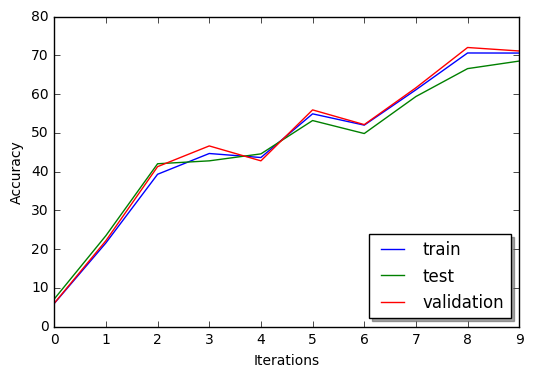

In [64]:
print "Final testing error = ", err1[1][-3]
print "Final training error = ", err1[0][-3]
print "Final validation error = ", err1[2][-3]

plt.plot([x for x in range(len(err1[0]))], err1[0], label = "train")
plt.plot([x for x in range(len(err1[1]))], err1[1], label = "test")
plt.plot([x for x in range(len(err1[2]))], err1[2], label = "validation")
plt.xlabel("Iterations")
plt.ylabel("Entropy")
plt.legend(loc='upper right', shadow=True)
plt.show()

plt.plot([x for x in range(len(acc1[0]))], acc1[0], label = "train")
plt.plot([x for x in range(len(acc1[1]))], acc1[1], label = "test")
plt.plot([x for x in range(len(acc1[2]))], acc1[2], label = "validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='lower right', shadow=True)
plt.show()

Final testing error =  0.555301875251
Final training error =  0.419584412477
Final validation error =  0.482314355388


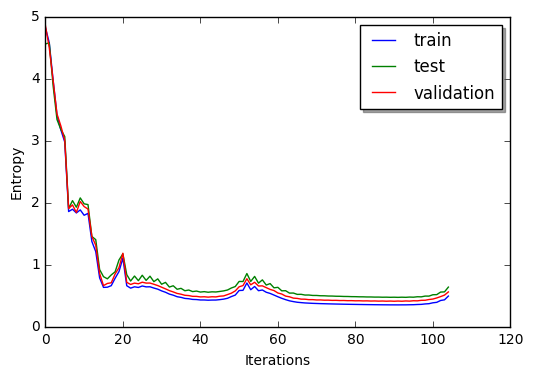

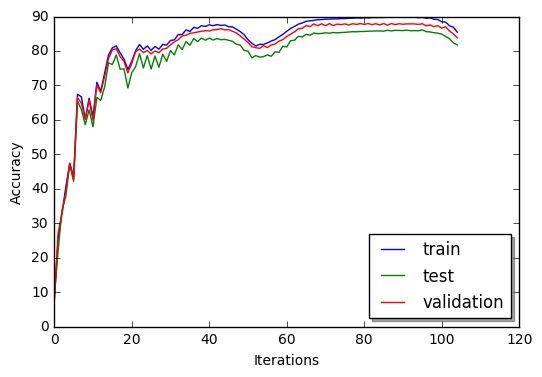

In [10]:
w_f = w_past[0]
print "Final testing error = ", err[1][-3]
print "Final training error = ", err[0][-3]
print "Final validation error = ", err[2][-3]

plt.plot([x for x in range(len(err[0]))], err[0], label = "train")
plt.plot([x for x in range(len(err[1]))], err[1], label = "test")
plt.plot([x for x in range(len(err[2]))], err[2], label = "validation")
plt.xlabel("Iterations")
plt.ylabel("Entropy")
plt.legend(loc='upper right', shadow=True)
plt.show()

plt.plot([x for x in range(len(acc[0]))], acc[0], label = "train")
plt.plot([x for x in range(len(acc[1]))], acc[1], label = "test")
plt.plot([x for x in range(len(acc[2]))], acc[2], label = "validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='lower right', shadow=True)
plt.show()